In [45]:
##Importing libraries
import scipy as sp
import numpy as np
import time as tm
import scipy.linalg

In [102]:
##if we take W to be an identity matrix, then X'WX is a square matrix of PxP dimension
## Similarly X'WY is a matrix of Px1
## so to simplyfy coding, we will write the equation as Ax = b, where A is PxP and b is Px1
##we need to generate only two matrices

a = np.random.rand(10,10) ## for testing our function
b = np.random.rand(10,1)  ## for testing out functions

In [76]:
##I will write a function for LU method and Inversion method and compare them
##I will also use the numpy solver
##I have a bad feeling about this, if I could reduce the time using my function, this would mean
## I have performed better then a highly optimized python library

def inverse_sol(a,b): ## solving using inverse
    x = np.matmul(np.linalg.inv(a),b)
    return x

print(inverse_sol(a,b))

def lu_sol(a,b): ## solving using LU decomposition
    p,l,u = scipy.linalg.lu(a)
    x = np.matmul(np.linalg.inv(u),np.matmul(np.linalg.inv(l),np.matmul(np.linalg.inv(p),b)))
    return x
print (lu_sol(a,b))

print(np.linalg.solve(a,b)) ## using solve from numpy library


    

[[ 1.67565128]
 [-1.34814212]
 [-1.28411495]
 [ 0.3944185 ]
 [-1.75948375]
 [ 2.65939159]
 [ 0.95418503]
 [-0.5560698 ]
 [-0.46622637]
 [ 1.38117675]]
[[ 1.67565128]
 [-1.34814212]
 [-1.28411495]
 [ 0.3944185 ]
 [-1.75948375]
 [ 2.65939159]
 [ 0.95418503]
 [-0.5560698 ]
 [-0.46622637]
 [ 1.38117675]]
[[ 1.67565128]
 [-1.34814212]
 [-1.28411495]
 [ 0.3944185 ]
 [-1.75948375]
 [ 2.65939159]
 [ 0.95418503]
 [-0.5560698 ]
 [-0.46622637]
 [ 1.38117675]]


In [71]:
## we get the same answer from all the three solvers, Now I will write a function to record the 
## the run time, and use it to compare


In [105]:
import scipy.sparse
def fn(function,b,c):
    st = tm.time()
    function(b,c)
    return (tm.time() - st)

In [124]:
inv = []
lu = []
inb = []
PL = []
for i in range(10):
    P = 1000+(i*1000)
    PL.append(P)
    a = scipy.sparse.rand(P,P, density= 1, format='coo', dtype=None, random_state=None)
    A = scipy.sparse.csr_matrix.todense(a)
    b = np.random.rand(P,1)
    inv.append(fn(inverse_sol,A,b))
    lu.append(fn(lu_sol,A,b))
    inb.append(fn(np.linalg.solve,A,b))
    


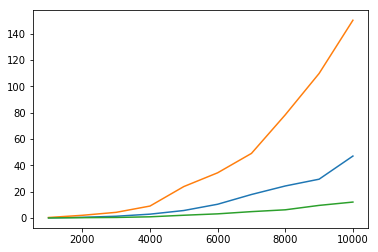

In [127]:
import matplotlib.pyplot as plt
plt.plot(PL, inv, PL, lu, PL, inb)
plt.show()


In [129]:
##LU decomposition took the maximum time, inverse function is in the middle and the inbuilt function
## is the best

In [136]:
##Exploring sparsity
P = 5000
spar = []
inb  = []
for i in range(10):
    k = 0.05 + i*0.1
    spar.append(k)
    a = scipy.sparse.rand(P,P, density= k, format='coo', dtype=None, random_state=None)
    A = scipy.sparse.csr_matrix.todense(a)
    b = np.random.rand(P,1)
    inb.append(fn(np.linalg.solve,A,b))
    

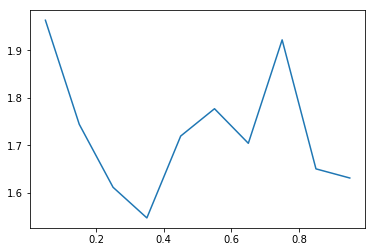

In [139]:
plt.plot(spar,inb)
plt.show()

In [135]:
P = 5000
spar = []
lu = []
for i in range(10):
    k = 0.05 + i*0.1
    spar.append(k)
    a = scipy.sparse.rand(P,P, density= k, format='coo', dtype=None, random_state=None)
    A = scipy.sparse.csr_matrix.todense(a)
    b = np.random.rand(P,1)
    lu.append(fn(lu_sol,A,b))

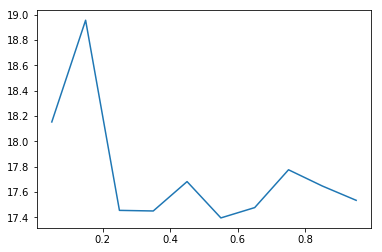

In [140]:
plt.plot(spar,lu)
plt.show()

In [ ]:
##time seems to be very high for very sparse matrices but latter there is hardly any observable 
## pattern